# 0 Overview

<u>Sections:</u>

0. **Install environment using environment.yml**
1. **Install and import libraries**
2. **Data Preprocessing**: converting unstructured data (pdfs) to structured data (text in table)
3. **Model Building**
    *   Word2Vec model
    *   LDAMallet model
4. **Data Analysis**: convert data from Section 3 to useful information for stakeholders. Data obtained from this section is fed into the dashboard
    *   LDAMallet model: determine which sentences are decarbonization related <br>
    *   Initiatives: filter for global standards and initiatives that companies are committed to
    *   Bigrams: find out the top 10 bigrams of each company
    *   Sentiment Analysis: find the sentiment level of each company

## **0. Environment Setup**
*   Code for environment setup: conda env create -f environment.yml

## **1. Getting Started**

### **1.1 Install Libraries**


In [1]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 16.6 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
--2021-11-16 21:22:36--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  2.80MB/s    in 19s     

2021-11-16 21:22:56 (838 KB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: 

  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Text2Classify.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Text2Vectors.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Classify$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Classify$2.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Classify$ReportOption.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Classify.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2FeatureConstraints.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Info$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Info.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/tui/Vectors2Vectors.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/Winnow.class  
  inflating: mallet-2.0.8/class/cc/mallet/classify/WinnowTrainer.class  
   creating: mallet-2.0.8/class/cc/mallet/cluste

  inflating: mallet-2.0.8/class/cc/mallet/fst/CRFTrainerByThreadedLabelLikelihood.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/CRFTrainerByValueGradients$OptimizableCRF.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/CRFTrainerByValueGradients.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/CRFWriter.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/FeatureTransducer$State.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/FeatureTransducer$Transition.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/FeatureTransducer$TransitionIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/FeatureTransducer.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/HMM$Incrementor.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/HMM$State.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/HMM$TransitionIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/HMM$WeightedIncrementor.class  
  inflating: mallet-2.0.8/class/cc/mallet/fst/HMM.class 

  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/AbstractBeliefPropagation$MaxProductMessageStrategy.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/AbstractBeliefPropagation$MessageStrategy.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/AbstractBeliefPropagation$SumProductMessageStrategy.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/AbstractBeliefPropagation.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/AbstractInferencer.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/BruteForceInferencer.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/ExactSampler.class  
   creating: mallet-2.0.8/class/cc/mallet/grmm/inference/gbp/
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/gbp/AbstractMessageStrategy.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/gbp/BPRegionGenerator.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/inference/gbp/ClusterVariationa

  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/ParameterizedFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/PottsTableFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/SkeletonFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/SparseAssignmentIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/TableFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/Tree.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/UndirectedGrid.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/UndirectedModel.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/UniformFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/UniNormalFactor.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/Universe.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/UnmodifiableVarSet.class  
  inflating: mallet-2.0.8/class/cc/mallet/grmm/types/Variable.class  
  inflating: ma

  inflating: mallet-2.0.8/class/cc/mallet/pipe/iterator/tests/TestPatternMatchIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/iterator/UnlabeledFileIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/LineGroupString2TokenSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/MakeAmpersandXMLFriendly.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/NGramPreprocessor$ReplacementSet.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/NGramPreprocessor.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/Noop.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/Pipe$SimplePipeInstanceIterator.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/Pipe.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/PipeException.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/PipeUtils.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/PrintInput.class  
  inflating: mallet-2.0.8/class/cc/mallet/pipe/PrintInputAndTarget.class  
  inflating

  inflating: mallet-2.0.8/class/cc/mallet/topics/PolylingualTopicModel$TopicAssignment.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/PolylingualTopicModel.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/RTopicModel.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/SimpleLDA.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicalNGrams$1WordProb.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicalNGrams.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicAssignment.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicInferencer.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicModelDiagnostics$TopicScores.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicModelDiagnostics.class  
  inflating: mallet-2.0.8/class/cc/mallet/topics/TopicReports.class  
   creating: mallet-2.0.8/class/cc/mallet/topics/tui/
  inflating: mallet-2.0.8/class/cc/mallet/topics/tui/DMRLoader.class  
  inflating: mallet-2.0.8/c

  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestMatrixn.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestMultinomial.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestPagedInstanceList.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestRankedFeatureVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable$WriteMe.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSparseMatrixn.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSparseVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestToken.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/Token.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/TokenSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/Vector.class  
   cr

  inflating: mallet-2.0.8/lib/mallet-deps.jar  
  inflating: mallet-2.0.8/lib/mtj-0.9.9.jar  
  inflating: mallet-2.0.8/lib/openjgraph.jar  
  inflating: mallet-2.0.8/lib/trove-2.0.2.jar  
  inflating: mallet-2.0.8/LICENSE    
  inflating: mallet-2.0.8/Makefile   
  inflating: mallet-2.0.8/pom.xml    
  inflating: mallet-2.0.8/README.md  
   creating: mallet-2.0.8/sample-data/
   creating: mallet-2.0.8/sample-data/numeric/
  inflating: mallet-2.0.8/sample-data/numeric/boxes.txt  
  inflating: mallet-2.0.8/sample-data/numeric/puffins.txt  
  inflating: mallet-2.0.8/sample-data/README  
   creating: mallet-2.0.8/sample-data/web/
   creating: mallet-2.0.8/sample-data/web/de/
  inflating: mallet-2.0.8/sample-data/web/de/apollo8.txt  
  inflating: mallet-2.0.8/sample-data/web/de/fiv.txt  
  inflating: mallet-2.0.8/sample-data/web/de/habichtsadler.txt  
  inflating: mallet-2.0.8/sample-data/web/de/hoechst.txt  
  inflating: mallet-2.0.8/sample-data/web/de/indogermanische.txt  
  inflating: m

  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/MinSegmentConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/NBestViterbiConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/PipedInstanceWithConfidence.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/QBCSequenceConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/RandomConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/RandomSequenceConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/SegmentProductConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/SequenceConfidenceInstance.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/TransducerConfidenceEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/TransducerCorrector.java  
  inflating: mallet-2.0.8/src/cc/mallet/fst/confidence/TransducerSequenceConfidenceEstim

  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/ACRF.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/ACRFEvaluator.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/AcrfSerialEvaluator.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/ACRFTrainer.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/DefaultAcrfTrainer.java  
   creating: mallet-2.0.8/src/cc/mallet/grmm/learning/extract/
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/extract/ACRFExtractor.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/extract/ACRFExtractorTrainer.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/extract/AcrfExtractorTui.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/GenericAcrfData2TokenSequence.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/GenericAcrfTui.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm/learning/MultiSegmentationEvaluatorACRF.java  
  inflating: mallet-2.0.8/src/cc/mallet/grmm

  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/DBInstanceIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/EmptyInstanceIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/FileIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/FileListIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/FileUriIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/LineGroupIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/LineIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/package.html  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/ParenGroupIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/PatternMatchIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/PipeExtendedIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/PipeInputIterator.java  
  inflating: mallet-2.0.8/src/cc/mallet/pipe/iterator/RandomFea

  inflating: mallet-2.0.8/src/cc/mallet/topics/PolylingualTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/RTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/SimpleLDA.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicalNGrams.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicAssignment.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicInferencer.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicModelDiagnostics.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/TopicReports.java  
   creating: mallet-2.0.8/src/cc/mallet/topics/tui/
  inflating: mallet-2.0.8/src/cc/mallet/topics/tui/DMRLoader.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/tui/EvaluateTopics.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/tui/HierarchicalLDATUI.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/tui/InferTopics.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/tui/TopicTrainer.java  
  inflating: mallet-2.0.8/src/cc

  inflating: mallet-2.0.8/src/cc/mallet/util/PlainLogFormatter.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/PrintUtilities.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/ProgressMessageLogFormatter.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/ProgressMessageLogRecord.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/PropertyList.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/Randoms.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/RegexFileFilter.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/Replacement.java  
  inflating: mallet-2.0.8/src/cc/mallet/util/Replacer.java  
   creating: mallet-2.0.8/src/cc/mallet/util/resources/
  inflating: mallet-2.0.8/src/cc/mallet/util/resources/logging.properties  
   creating: mallet-2.0.8/src/cc/mallet/util/resources/wn/
  inflating: mallet-2.0.8/src/cc/mallet/util/resources/wn/database_properties.xml  
  inflating: mallet-2.0.8/src/cc/mallet/util/resources/wn/Examples.java  
  inflating: mallet-2.0.8/src/cc/mallet

### **1.2 Import Libraries**

In [2]:
# 2.1 Text Extraction
import re
import os
import fitz
import numpy as np
import pandas as pd
import math

# 2.2 Data Cleaning
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy

# 2.3 Creating Corpus
import gensim.corpora as corpora

# 2.4 Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# 3.1 Word2Vec Model
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 3.2 LDA Mallet Model
from gensim.models import CoherenceModel

# 4.3 Bigram Analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# 4.4 Sentiment Analysis
from textblob import TextBlob
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nelsonho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(gensim.__version__)

3.6.0


## **2. Data Preprocessing**

### **2.1 Text Extraction**
*   Import PDF using PyMUPDF
*   Clean up weird symbols, characters
*   Split text into sentences

In [4]:
def read_pdf(fi):

    directory = 'data/type/' + fi

    data = {'name': [], 'sentence': [], 'year': []}
    data = pd.DataFrame(data)

    for filename in os.listdir(directory):
        if filename[-3:] != "pdf" or filename == ".DS_Store" or filename == "Tokio Marine-2019.pdf":  # to filter out non pdf files and corrupted pdf files
            continue

        companyname = filename.split("-", 1)[0]
        year = int(filename.split('-')[-1][:-4])
        
        file_path = directory + '/' + filename
        pymupdf_text = ""
        with fitz.open(file_path) as doc:
            for page in doc:
                pymupdf_text += page.getText()
        
        new_row = {'name': companyname, 'sentence': pymupdf_text, 'year': year}
        data = data.append(new_row, ignore_index=True)
    return data

In [5]:
# function takes in a report and breaks it up into individual sentences
def convert_pdf_into_sentences(text):

    # remove unnecessary spaces and line breaks
    text = re.sub(r'\x0c\x0c|\x0c', "", str(text))
    text = re.sub('\n ', '', str(text))
    text = re.sub('\n', ' ', str(text))
    text = ' '.join(text.split())
    text = " " + text + "  "
    text = text.replace("\n", " ")
    if "”" in text: text = text.replace(".”", "”.")
    if "\"" in text: text = text.replace(".\"", "\".")
    if "!" in text: text = text.replace("!\"", "\"!")
    if "?" in text: text = text.replace("?\"", "\"?")
    text = text.replace(".", ".<stop>")
    text = text.replace("?", "?<stop>")
    text = text.replace("!", "!<stop>")
    text = text.replace("<prd>", ".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]

    #filter for sentences with more than 100 characters
    sentences = [s.strip() for s in sentences if len(s) > 100]
    return sentences

In [6]:
# function takes in a report and breaks it up into individual sentences
def clean_text(df):
    
    data = {'name': [], 'sentence': [], 'year': []}
    data = pd.DataFrame(data)

    for i in range(len(df.index)):
        name = df.iloc[i, 0]
        text = df.iloc[i, 1]
        year = df.iloc[i, 2]

        sentences = convert_pdf_into_sentences(text)
        
        if not sentences:
            continue
        else:
            new_line = pd.DataFrame({'name': name, 'sentence':sentences, 'year': year})
            #print(new_line)
            data = data.append(new_line, ignore_index=True)
    return data

In [7]:
def extract_text(path):
    text = read_pdf(path)
    sentences = clean_text(text)
    return sentences

In [8]:
# Conduct text extraction 
asian_banks_sentences = extract_text('asian_banks')
asian_banks_sentences['type'] = 'ab'

asset_managers_sentences = extract_text('asset_managers')
asset_managers_sentences['type'] = 'am'

insurance_sentences = extract_text('insurance')
insurance_sentences['type'] = 'ins'

pension_funds_sentences = extract_text('pension_funds')
pension_funds_sentences['type'] = 'pf'

all_sentences = pd.concat([asian_banks_sentences, asset_managers_sentences, insurance_sentences, pension_funds_sentences], ignore_index = True)

### **2.2 Text Cleaning**
*   Gensim preprocessing
*   Removing stopwords
*   Create bigram models
*   Lemmatization

In [9]:
# function for gensim preprocessing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  

In [10]:
# function for creating stopwords (english stopwords, context specific words, company names)
def create_stopwords():
    stop_words = stopwords.words('english')

    complabels = pd.read_csv('data/companylabels.csv', usecols=['fullname', 'shortform'])
    ls_comp = complabels['fullname'].unique().tolist() + complabels['shortform'].unique().tolist()
    for name in ls_comp:
        for n in name.split(' '):
            stop_words.append(n.lower())

    stop_words.extend(['accounting', 'active', 'income', 'adventure', 'allocation', 'shares', 'amortization', 'amplitude', 'annuity', 'appreciation', 'arbitrage', 'ask', 'asset', 'asset approach', 'aval'])
    stop_words.extend(['plc', 'group', 'target', 'track', 'capital', 'holding', 'report', 'annualreport', 'esg', 'bank', 'report', 'annualreport', 'long', 'make', 'fy'])
    return stop_words

# function for removing stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [11]:
# function for creating bigram models
def create_bigram_mod():
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases. 
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

# function for making bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [12]:
# function for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
# apply all functions (gensim preprocessing, stopwords removal, bigram creation, lemmatization)
data = all_sentences.sentence.values.tolist()
data_words = list(sent_to_words(data))
bigram_mod = create_bigram_mod()
stop_words = create_stopwords()

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

### **2.3 Creating Corpus**

In [14]:
id2word = corpora.Dictionary(data_lemmatized) # create dictionary
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts] # create corpus

### **2.4 Bag of Words**

In [15]:
# Creation of bag of words model
# Run generate_sentiment_score function below first, before running bag of words model
def bag_of_words(df):
    cv = CountVectorizer(max_features=1000)
    df_final = cv.fit_transform(list(df['sentence'])).toarray()
    vocab = cv.get_feature_names()
    df2 = pd.DataFrame(df_final,columns=vocab)
    df2['optimism'] = df['sentiment_score'].tolist()
    return df2

## **3. Model Building**

### **3.1 Word2Vec Model**

In [16]:
def word2vec(df,company_name,*args):
    sent = [list(filter(lambda x:x not in stopwords.words('english'),row.split())) for row in df['sentence'].loc[df['name']==company_name]]
    phrases = Phrases(sent, min_count=10)
    bigram = Phraser(phrases)
    sentences = bigram[sent]

    w2v_model = Word2Vec(min_count=1,
                         window=3,
                         size=55,
                         sample=6e-5, 
                         alpha=0.05, 
                         min_alpha=0.0007, 
                         negative=20,
                         )
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

    vocabs = []
    vecs = []
    for word in w2v_model.wv.vocab:
        vocabs.append(word)
        vecs.append(w2v_model[word])

    sub_vecs = vecs[:40]
    sub_vocab = vocabs[:40]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(sub_vecs)

    for word in args:
        return w2v_model.most_similar(word,topn=50)

In [17]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0,55), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    reduc = PCA(n_components=21).fit_transform(arrays)

    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

['1', 'A', 'key', 'objective', 'Taiwan_Life', 'implementation', 'ESG', 'principles', 'across', 'business', 'operations.', 'Sustainable', 'Development', 'Goals', '(SDGs),', 'incorporating', 'corporate', 'governance', 'decision', 'making,', 'insurance', 'operations,', 'investment', 'lending', 'recent', 'years.', 'As', 'part', 'commitment', 'supporting', 'sustainable', 'development', 'around', 'world,', 'voluntarily', 'introduced', 'U.', 'Also', 'year,', 'formally', 'Principles', 'Responsible', 'Investment', '(PRI)', 'stipulated', 'Policy', 'Operating', 'Regulations', 'order', 'implement', 'evaluations', 'within', 'processes', 'post-investment', 'management.', 'In', 'July', 'also', 'released', 'Report', 'Stewardship', '(assured', 'third', 'party),', 'demonstrating', 'determination', 'support', 'practice', 'green', 'financing.', 'Furthermore,', "Taiwan_Life's", 'parent', 'company,', 'CTBC', 'Holding,', 'officially', 'signed', 'Task', 'Force', 'Climate-related', 'Financial', 'Disclosures', 

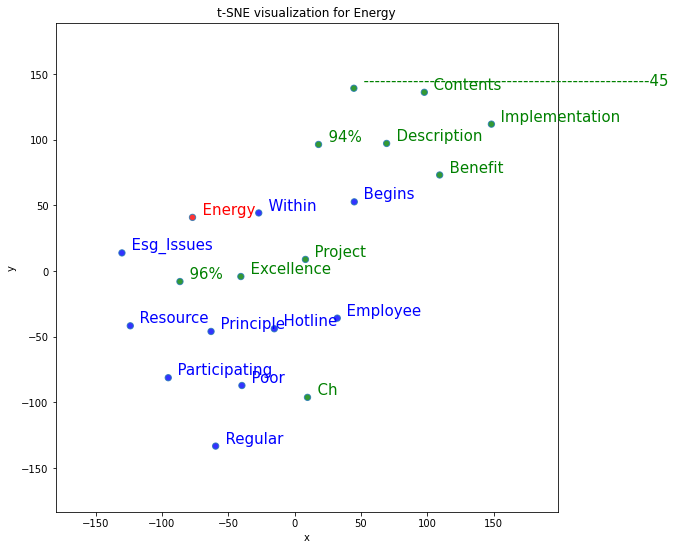

In [18]:
def word2vec_tsne(df,company_name,args):
    sent = [list(filter(lambda x:x not in stopwords.words('english'),row.split())) for row in df['sentence'].loc[df['name']==company_name]]
    phrases = Phrases(sent, min_count=10)
    bigram = Phraser(phrases)
    sentences = bigram[sent]

    w2v_model = Word2Vec(min_count=1,
                         window=3,
                         size=55,
                         sample=6e-5, 
                         alpha=0.05, 
                         min_alpha=0.0007, 
                         negative=20,
                         )
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

    vocabs = []
    vecs = []
    for word in w2v_model.wv.vocab:
        vocabs.append(word)
        vecs.append(w2v_model[word])
    print(vocabs)

    sub_vecs = vecs[:40]
    sub_vocab = vocabs[:40]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(sub_vecs)
    tsnescatterplot(w2v_model, args,  [i[0] for i in w2v_model.wv.most_similar(negative=['financial'])])

word2vec_tsne(insurance_sentences, 'Taiwan Life', 'energy')

### **3.2 LDA Mallet Model**


*   Build optimal LDA Mallet Model
*   Find optimal number of topics & save optimal model



In [22]:
os.environ.update({'MALLET_HOME':r'C:/mallet/mallet-2.0.8/'})
mallet_path = 'C:/mallet/mallet-2.0.8/bin/mallet'

In [23]:
# function to compute coherence value of each model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [24]:
# find optimal model and optimal number of topics for LDA model (highest coherence value)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)
max_value = max(coherence_values)
max_index = coherence_values.index(max_value)
topic_num = list(range(2, 21, 2))

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 1125
total tokens: 3111666
<10> LL/token: -8.25081
<20> LL/token: -8.19702
<30> LL/token: -8.0503
<40> LL/token: -7.92093

0	25	risk company year include market total asset change security term base statement interest rate equity loan annual business net fair 
1	25	business sustainability customer risk sustainable corporate support governance development social climate environmental work service provide product community director policy impact 

<50> LL/token: -7.83529
<60> LL/token: -7.78037
<70> LL/token: -7.74279
<80> LL/token: -7.71571
<90> LL/token: -7.69618

0	25	risk company include year change market total asset security base term annual statement interest rate equity loan increase net fair 
1	25	business customer sustainability support provide corporate work sustainable governance climate development social service environmental product strategy director community performance system 

<100> LL/token: -7.

<910> LL/token: -7.61609
<920> LL/token: -7.61592
<930> LL/token: -7.61606
<940> LL/token: -7.61586

0	25	risk company include year change market total asset base security term annual director policy statement interest rate equity information loan 
1	25	business customer sustainability provide support corporate work sustainable climate governance development social service product environmental strategy community system responsible health 

<950> LL/token: -7.6155
<960> LL/token: -7.61539
<970> LL/token: -7.61505
<980> LL/token: -7.6154
<990> LL/token: -7.61505

0	25	risk company include year change market total asset base security term policy annual director statement interest rate equity information loan 
1	25	business customer sustainability provide support corporate work sustainable climate governance development social service product environmental strategy community system responsible health 

<1000> LL/token: -7.61483

Total time: 1 minutes 33 seconds
Mallet LDA: 4 topics, 2 top

<460> LL/token: -7.66921
<470> LL/token: -7.66802
<480> LL/token: -7.66715
<490> LL/token: -7.66688

0	12.5	customer provide support work service product health people time training improve develop project program development employee digital technology lead programme 
1	12.5	year market total asset security include statement interest term rate equity loan net fair change increase loss amount fund note 
2	12.5	risk company policy information director include system process ensure executive member internal control business base establish compliance committee review manage 
3	12.5	business sustainability corporate sustainable climate impact governance social environmental performance issue strategy responsible activity datum approach development initiative good client 

<500> LL/token: -7.66546
<510> LL/token: -7.66454
<520> LL/token: -7.66375
<530> LL/token: -7.66317
<540> LL/token: -7.66223

0	12.5	customer provide support work service product health people time training improve projec

Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 1125
total tokens: 3111666
<10> LL/token: -9.27767
<20> LL/token: -9.1016
<30> LL/token: -8.74441
<40> LL/token: -8.49718

0	8.33333	company climate business energy development activity policy finance support include project green invest sector client carbon reduce industry sustainable term 
1	8.33333	risk director company executive internal control policy committee information review compliance process audit annual plan member business related establish include 
2	8.33333	year total asset security interest rate equity loan statement net fair loss amount fund note change tax liability account bond 
3	8.33333	sustainability governance social environmental sustainable corporate performance community impact approach good stakeholder gri initiative material disclosure employee development economic principle 
4	8.33333	customer provide work service support product digital company business system program health peopl

<410> LL/token: -7.71964
<420> LL/token: -7.71824
<430> LL/token: -7.71756
<440> LL/token: -7.71746

0	8.33333	climate change sustainable client development impact industry energy opportunity project emission focus green invest develop reduce sector goal finance carbon 
1	8.33333	risk policy director information process system ensure executive member internal control committee review establish compliance manage annual report conduct meeting 
2	8.33333	year total asset security interest rate equity loan net statement fair loss amount fund note share tax liability account bond 
3	8.33333	sustainability corporate business governance social environmental performance issue responsible approach good community datum stakeholder gri strategy engagement principle economic material 
4	8.33333	customer provide service support work product health training program digital people improve programme enhance branch experience education launch offer day 
5	8.33333	company market business include base te

<810> LL/token: -7.70953
<820> LL/token: -7.70912
<830> LL/token: -7.70903
<840> LL/token: -7.70927

0	8.33333	climate change sustainable client development industry impact energy opportunity project emission develop green invest focus reduce goal sector finance carbon 
1	8.33333	risk policy information director process system ensure executive member internal control manage committee compliance review annual establish report conduct meeting 
2	8.33333	year total asset security interest rate equity loan net statement fair loss amount fund note share tax liability account bond 
3	8.33333	sustainability corporate business governance social environmental performance issue responsible approach community good datum stakeholder gri strategy engagement principle material practice 
4	8.33333	customer provide service work support product health training program digital improve people programme enhance branch experience education launch offer day 
5	8.33333	company market include business base te

<160> LL/token: -7.81251
<170> LL/token: -7.80101
<180> LL/token: -7.7925
<190> LL/token: -7.78558

0	6.25	risk policy information process system ensure internal control manage review compliance measure establish include conduct regulation implement audit requirement relevant 
1	6.25	company director executive member annual training number committee employee shareholder team meeting program year part chief time senior department independent 
2	6.25	sustainability corporate governance social environmental issue responsible performance approach strategy stakeholder gri sustainable business engagement principle material practice economic disclosure 
3	6.25	climate change impact company portfolio energy project emission high green increase low invest reduce sector industry carbon analysis market activity 
4	6.25	customer business provide service product client good fnancial digital technology award branch experience finance solution protection quality launch research offer 
5	6.25	term inc

<460> LL/token: -7.73133
<470> LL/token: -7.73248
<480> LL/token: -7.73222
<490> LL/token: -7.73368

0	6.25	risk policy information process system ensure internal manage control review compliance measure include conduct establish implement audit regulation assessment requirement 
1	6.25	company director annual executive member number training committee shareholder team employee meeting time part chief senior department unit independent meet 
2	6.25	sustainability corporate sustainable governance social environmental issue responsible strategy approach business performance stakeholder gri engagement principle material practice disclosure economic 
3	6.25	climate change impact portfolio energy project emission company green invest low reduce sector industry carbon analysis high country scope building 
4	6.25	customer business provide service product client fnancial good digital technology award branch datum experience protection improve launch solution finance offer 
5	6.25	market term b

<760> LL/token: -7.7237
<770> LL/token: -7.72406
<780> LL/token: -7.7241
<790> LL/token: -7.72412

0	6.25	risk policy information process system ensure internal manage control review compliance conduct measure establish include implement audit regulation relevant requirement 
1	6.25	company director annual executive number member training committee shareholder team employee meeting time part chief senior include department share independent 
2	6.25	sustainability sustainable corporate governance social environmental issue responsible strategy approach performance business stakeholder gri engagement principle material practice disclosure economic 
3	6.25	climate change impact portfolio energy project emission green invest industry company low reduce sector carbon analysis high country scope building 
4	6.25	customer business provide service product client good fnancial digital technology award branch experience improve protection enhance launch solution finance offer 
5	6.25	market term

<50> LL/token: -8.45866
<60> LL/token: -8.2654
<70> LL/token: -8.13913
<80> LL/token: -8.05557
<90> LL/token: -7.99761

0	5	total asset year interest net fair loss amount security statement loan note tax liability rate account end consolidated equity contract 
1	5	company term portfolio emission fund sector bond equity invest base energy carbon include scope list water private reduction domestic large 
2	5	work support training health employee program digital provide community programme branch experience people education day platform development online care professional 
3	5	risk information policy process system internal control related manage measure include operation assessment framework audit ensure identify assess monitor line 
4	5	market include result level base increase high period basis due rate model follow return significant apply entity change expect require 
5	5	climate change client opportunity project green focus time achieve part technology industry drive building impac

<300> LL/token: -7.79083
<310> LL/token: -7.78823
<320> LL/token: -7.78775
<330> LL/token: -7.78649
<340> LL/token: -7.78356

0	5	total asset year interest net fair loss amount statement loan security note tax liability consolidated end account rate contract instrument 
1	5	company portfolio energy term emission high reduce sector equity bond fund low carbon include return base scope green analysis exposure 
2	5	work health support employee training program digital people programme experience education provide community day platform professional online care skill foundation 
3	5	risk policy information process system internal ensure control manage compliance related measure security conduct regulation assessment establish include requirement framework 
4	5	market level result include base increase period rate year model term basis due require transaction apply expect entity significant condition 
5	5	climate change sustainable impact client strategy focus opportunity project finance go

<560> LL/token: -7.76636
<570> LL/token: -7.76522
<580> LL/token: -7.76564
<590> LL/token: -7.76549

0	5	total asset year interest net fair loss amount loan statement security note tax liability end account consolidated contract equity instrument 
1	5	company portfolio energy emission high green reduce sector low bond equity carbon fund include return scope analysis building exposure base 
2	5	work health support training employee program people digital programme provide community education day platform professional safety care skill foundation woman 
3	5	risk policy information process system internal ensure control manage compliance related measure security include conduct regulation establish requirement datum framework 
4	5	market base include level result term increase rate year period basis model due apply entity significant factor expect condition require 
5	5	climate change sustainable impact strategy client focus opportunity finance goal industry commitment action drive projec

<800> LL/token: -7.75044
<810> LL/token: -7.75025
<820> LL/token: -7.75089
<830> LL/token: -7.75092
<840> LL/token: -7.7518

0	5	total asset year interest net fair loan loss amount statement security note tax liability account consolidated equity end contract instrument 
1	5	company portfolio energy emission high green include reduce project sector low bond carbon equity fund scope base building exposure water 
2	5	work support health employee training program people community provide programme education safety day professional care covid foundation skill woman talent 
3	5	risk policy information process system internal control ensure compliance measure manage datum related security conduct include establish regulation review requirement 
4	5	market term year level result base increase include rate period return basis model due performance expect significant apply entity condition 
5	5	climate change sustainable impact strategy client focus opportunity goal finance commitment action dr

<50> LL/token: -8.50742
<60> LL/token: -8.29678
<70> LL/token: -8.16171
<80> LL/token: -8.07152
<90> LL/token: -8.01211

0	4.16667	customer service development product training develop digital growth experience programme business finance technology create provide enhance platform program solution improve 
1	4.16667	sustainability social governance environmental sustainable corporate approach stakeholder gri performance material principle disclosure responsible economic engagement page issue responsibility practice 
2	4.16667	support project area business initiative society branch development service aim contribute promote green product issue local provide building focus achieve 
3	4.16667	term increase number plan include share benefit pay payment base period due fund individual loan return performance cost account rate 
4	4.16667	company director executive member shareholder committee team meeting annual corporate responsible chief review senior role meet department independent matter

<250> LL/token: -7.81544
<260> LL/token: -7.81281
<270> LL/token: -7.80915
<280> LL/token: -7.80713
<290> LL/token: -7.8044

0	4.16667	customer service product provide business digital develop improve experience technology enhance solution quality launch platform offer enable access deliver innovation 
1	4.16667	sustainability social governance sustainable environmental corporate approach stakeholder responsible gri material disclosure issue principle performance economic page engagement responsibility strategy 
2	4.16667	development support activity project promote area initiative society local aim branch community create environment contribute build business resource focus effort 
3	4.16667	year term number plan increase performance rate share period benefit pay payment due individual end receive loan include interest date 
4	4.16667	company director executive member shareholder committee team meeting annual chief issue corporate role senior review meet department independent remuner

<450> LL/token: -7.78524
<460> LL/token: -7.78357
<470> LL/token: -7.78352
<480> LL/token: -7.78358
<490> LL/token: -7.7816

0	4.16667	customer service product provide business digital improve develop experience technology enhance solution launch quality platform offer enable access innovation online 
1	4.16667	sustainability social governance sustainable environmental corporate approach responsible stakeholder gri performance material disclosure issue principle page economic strategy engagement practice 
2	4.16667	development support activity promote project business area initiative community focus society local create aim branch environment resource continue contribute build 
3	4.16667	year term rate increase number plan share performance period benefit pay loan payment interest due end individual receive date time 
4	4.16667	company director executive member shareholder committee team meeting review issue chief role corporate senior meet annual department independent position remune

<650> LL/token: -7.77774
<660> LL/token: -7.77613
<670> LL/token: -7.7777
<680> LL/token: -7.77646
<690> LL/token: -7.7768

0	4.16667	customer service product provide business digital improve technology experience develop enhance launch quality solution platform enable offer access innovation enterprise 
1	4.16667	sustainability social governance sustainable corporate environmental approach responsible stakeholder gri material performance disclosure issue principle page strategy engagement economic responsibility 
2	4.16667	development support business activity promote focus community area initiative society create local continue aim environment sustainable growth contribute build resource 
3	4.16667	year term rate increase number plan share performance interest loan period benefit pay end payment due individual receive date time 
4	4.16667	company director executive member shareholder committee meeting team issue annual corporate chief review senior meet department independent positio

<850> LL/token: -7.77256
<860> LL/token: -7.77142
<870> LL/token: -7.77145
<880> LL/token: -7.7714
<890> LL/token: -7.77173

0	4.16667	customer service product provide business digital improve technology branch experience enhance launch solution develop quality platform offer enable access innovation 
1	4.16667	sustainability social governance corporate environmental sustainable approach responsible stakeholder gri performance material disclosure issue principle engagement page economic strategy responsibility 
2	4.16667	development support business activity promote sustainable focus area community initiative create society local goal develop environment aim growth continue build 
3	4.16667	year term rate increase number plan share interest performance loan period benefit end pay payment due individual receive date time 
4	4.16667	company director executive member shareholder committee meeting team annual issue review corporate chief senior meet department independent remuneration posi

<50> LL/token: -8.54319
<60> LL/token: -8.32153
<70> LL/token: -8.17871
<80> LL/token: -8.08587
<90> LL/token: -8.01986

0	3.57143	sustainable development strategy focus goal create growth develop commitment client build drive achieve invest culture opportunity diversity business promote finance 
1	3.57143	asset total net fair loss amount loan statement note tax liability consolidated contract instrument account expense debt reserve derivative security 
2	3.57143	customer service product provide digital training branch experience technology improve platform offer enhance access enable online launch channel knowledge learn 
3	3.57143	risk policy internal control compliance regulation requirement manage review relevant framework ensure report regulatory law relate monitor procedure process accordance 
4	3.57143	climate change energy impact emission portfolio low reduce carbon sector related scope green high transition target water opportunity building consumption 
5	3.57143	business info

<260> LL/token: -7.80896
<270> LL/token: -7.8074
<280> LL/token: -7.80584
<290> LL/token: -7.80287

0	3.57143	sustainable development strategy focus client goal growth create commitment opportunity invest develop build achieve drive culture continue diversity role society 
1	3.57143	asset total net fair loss loan amount statement note tax liability consolidated contract instrument account cost expense debt reserve derivative 
2	3.57143	customer service product provide digital improve branch experience technology enhance offer platform access consumer online quality enable develop channel knowledge 
3	3.57143	risk policy internal control manage compliance process ensure regulation review requirement assessment framework relevant identify monitor regulatory law procedure act 
4	3.57143	climate change portfolio energy emission low reduce green carbon impact scope related sector building transition water target consumption reduction analysis 
5	3.57143	business information include system s

<460> LL/token: -7.78761
<470> LL/token: -7.78586
<480> LL/token: -7.78626
<490> LL/token: -7.78596

0	3.57143	development sustainable strategy focus create goal growth commitment opportunity client develop drive build achieve invest culture continue role environment diversity 
1	3.57143	asset total net loan fair loss amount statement note tax liability consolidated account instrument contract cost expense debt reserve derivative 
2	3.57143	customer service product provide improve digital technology branch experience enhance offer platform access consumer quality online enable develop channel knowledge 
3	3.57143	risk policy internal control manage compliance process review regulation ensure requirement assessment framework relevant identify monitor regulatory law procedure accordance 
4	3.57143	climate change portfolio energy emission low reduce green carbon scope related impact building sector transition water target consumption reduction source 
5	3.57143	business information system

<660> LL/token: -7.78063
<670> LL/token: -7.78105
<680> LL/token: -7.78195
<690> LL/token: -7.78158

0	3.57143	development sustainable strategy focus create goal growth commitment opportunity develop build drive achieve society culture continue aim environment resource invest 
1	3.57143	asset total net loan fair loss amount statement note tax liability consolidated account instrument cost contract expense reserve debt derivative 
2	3.57143	customer service product provide improve digital technology branch experience enhance offer platform consumer quality online enable access channel launch knowledge 
3	3.57143	risk policy internal control manage compliance process review regulation assessment ensure requirement framework relevant identify monitor regulatory law procedure accordance 
4	3.57143	climate change energy portfolio emission green reduce carbon low scope impact building related transition water sector target consumption reduction source 
5	3.57143	business information system i

<860> LL/token: -7.77342
<870> LL/token: -7.77126
<880> LL/token: -7.77126
<890> LL/token: -7.77008

0	3.57143	development sustainable strategy focus create goal growth commitment opportunity build society achieve environment develop drive continue promote culture aim resource 
1	3.57143	asset total loan net fair loss amount statement note tax liability consolidated account cost instrument contract expense reserve debt derivative 
2	3.57143	customer service product provide improve digital technology branch experience enhance offer platform quality consumer online enable access channel knowledge develop 
3	3.57143	risk policy internal manage control process compliance review regulation assessment ensure framework requirement relevant monitor identify law regulatory procedure accordance 
4	3.57143	climate change energy emission green reduce portfolio carbon low scope building impact transition sector water related target project consumption reduction 
5	3.57143	business information syste

<50> LL/token: -8.55604
<60> LL/token: -8.35608
<70> LL/token: -8.2249
<80> LL/token: -8.13196
<90> LL/token: -8.06509

0	3.125	director executive member annual committee shareholder meeting audit corporate review company chief senior department independent matter report position remuneration hold 
1	3.125	customer service product provide time branch digital offer day platform online channel access person covid application experience face full system 
2	3.125	company issue client engage make engagement invest business important continue decision understand dialogue relationship fnancial ensure stewardship maintain challenge address 
3	3.125	work health employee training program programme education culture people diversity support care skill woman talent child knowledge professional learn family 
4	3.125	risk climate change process manage related control assessment framework opportunity identify assess monitor factor relate impact operational include internal review 
5	3.125	policy info

<210> LL/token: -7.83274
<220> LL/token: -7.82733
<230> LL/token: -7.82084
<240> LL/token: -7.81465

0	3.125	director executive member annual committee shareholder meeting review audit chief report senior corporate department independent matter remuneration external position officer 
1	3.125	customer service product provide digital branch offer platform access experience online fnancial consumer launch channel person application face covid technology 
2	3.125	company issue engagement make engage important understand give address decision place key responsible action practice dialogue view relationship stewardship voting 
3	3.125	health work employee training program programme education people day diversity culture care skill woman talent child knowledge professional staff provide 
4	3.125	risk climate change process manage related control assessment framework opportunity identify assess monitor impact relate internal operational factor potential strategy 
5	3.125	policy information sys

<360> LL/token: -7.79052
<370> LL/token: -7.78987
<380> LL/token: -7.78762
<390> LL/token: -7.78656

0	3.125	director executive member committee shareholder annual review meeting audit report chief senior corporate department internal independent external matter remuneration position 
1	3.125	customer service product provide digital branch platform offer access experience online fnancial consumer launch channel person application face survey sale 
2	3.125	company issue make engagement engage important understand give address decision place action dialogue view process responsible stewardship seek step consideration 
3	3.125	health work employee training program programme education day safety diversity people culture care skill woman talent child knowledge professional staff 
4	3.125	risk climate change manage related process impact control assessment framework opportunity identify assess monitor relate factor potential operational strategy measure 
5	3.125	policy information system con

<510> LL/token: -7.77048
<520> LL/token: -7.77077
<530> LL/token: -7.77176
<540> LL/token: -7.77164

0	3.125	director executive member committee annual shareholder review meeting audit report chief internal senior external department corporate independent matter remuneration position 
1	3.125	customer service product provide digital branch offer platform experience access consumer online launch fnancial channel application face technology survey sale 
2	3.125	company issue engagement make engage give important understand address decision place action process addition dialogue view responsible stewardship seek voting 
3	3.125	health work employee training program programme education safety day diversity people care skill woman child knowledge talent provide staff professional 
4	3.125	risk climate change manage related impact process assessment framework control opportunity identify analysis assess monitor potential factor relate operational strategy 
5	3.125	policy information system c

<660> LL/token: -7.76323
<670> LL/token: -7.76426
<680> LL/token: -7.76329
<690> LL/token: -7.76298

0	3.125	director executive member committee annual shareholder review meeting audit report internal chief senior department external independent corporate matter remuneration position 
1	3.125	customer service product provide digital branch offer platform experience access consumer online launch fnancial channel technology application face sale survey 
2	3.125	company issue make engagement engage give important understand address place decision action dialogue process addition view stewardship voting concern great 
3	3.125	health work employee training program programme education safety day diversity care people skill woman talent child knowledge staff provide professional 
4	3.125	risk climate change impact manage related process framework assessment analysis identify opportunity assess potential monitor control factor strategy operational relate 
5	3.125	policy information system cond

<810> LL/token: -7.76051
<820> LL/token: -7.75956
<830> LL/token: -7.76031
<840> LL/token: -7.7609

0	3.125	director executive member committee review annual shareholder meeting audit internal report chief external senior department independent matter corporate remuneration position 
1	3.125	customer service product provide digital branch offer platform experience access consumer online launch channel fnancial technology application face sale enable 
2	3.125	company issue make engagement engage important give address understand place decision action process dialogue view seek vote addition voting stewardship 
3	3.125	health work employee training program programme education safety day diversity care provide skill woman talent child knowledge staff people professional 
4	3.125	risk climate change impact manage related process assessment framework analysis opportunity identify potential assess monitor factor relate operational measure strategy 
5	3.125	policy information system conduct s

<950> LL/token: -7.7604
<960> LL/token: -7.76201
<970> LL/token: -7.76214
<980> LL/token: -7.76068
<990> LL/token: -7.76147

0	3.125	director executive member committee review annual shareholder meeting audit report chief internal senior department external independent corporate matter remuneration position 
1	3.125	customer service product provide digital branch offer platform experience access consumer online launch fnancial channel application technology face communication sale 
2	3.125	company issue make engagement engage important give address understand place decision action process dialogue view seek vote addition concern great 
3	3.125	work health employee training program programme education safety day diversity care skill woman child knowledge professional staff talent provide person 
4	3.125	risk climate change impact manage related process assessment framework analysis opportunity identify potential assess monitor factor relate operational measure strategy 
5	3.125	policy i

<100> LL/token: -8.00504
<110> LL/token: -7.97012
<120> LL/token: -7.94145
<130> LL/token: -7.91828
<140> LL/token: -7.90155

0	2.77778	interest rate loan security equity total fair asset bond instrument contract liability exchange transaction debt hold derivative cash foreign account 
1	2.77778	customer provide service product branch fnancial offer quality access online consumer experience improve deliver solution channel launch application financing sme 
2	2.77778	sustainability corporate sustainable governance social responsible environmental development principle strategy finance responsibility practice commitment goal economic environment culture framework business 
3	2.77778	business operation client ensure line key operate manage continue maintain objective design understand relationship order integrate achieve make ability purpose 
4	2.77778	policy system internal control information compliance conduct establish regulation requirement review report law security accordance regul

<260> LL/token: -7.83197
<270> LL/token: -7.82907
<280> LL/token: -7.82722
<290> LL/token: -7.82413

0	2.77778	interest rate security loan equity total fair bond asset instrument exchange debt hold derivative account cash transaction foreign amount liability 
1	2.77778	customer provide service product branch offer access quality consumer fnancial online launch solution channel application experience platform enable improve sme 
2	2.77778	sustainability sustainable corporate governance social environmental responsible development principle strategy finance responsibility commitment goal practice environment economic society culture growth 
3	2.77778	business client operation ensure continue line achieve focus key operate maintain strong objective understand relationship purpose integrate area place deliver 
4	2.77778	policy information system internal control compliance conduct establish regulation requirement security law guideline regulatory accordance code protection procedure act su

<410> LL/token: -7.81146
<420> LL/token: -7.80957
<430> LL/token: -7.8086
<440> LL/token: -7.81031

0	2.77778	interest rate equity loan security total bond fair asset instrument exchange debt account hold derivative transaction cash foreign amount hedge 
1	2.77778	customer provide service product branch offer access consumer online quality launch fnancial channel solution application experience platform improve enable complaint 
2	2.77778	sustainability sustainable corporate governance social responsible environmental development principle strategy finance responsibility goal commitment society environment economic practice contribute growth 
3	2.77778	business client operation ensure continue line achieve focus key operate objective maintain area strong relationship make effective understand deliver purpose 
4	2.77778	policy information system internal control compliance conduct establish regulation requirement security protection law guideline accordance regulatory code act procedure

<550> LL/token: -7.80179
<560> LL/token: -7.80304
<570> LL/token: -7.80306
<580> LL/token: -7.80443
<590> LL/token: -7.80213

0	2.77778	interest rate loan equity security total bond fair instrument asset exchange debt derivative account hold transaction cash foreign amount fund 
1	2.77778	customer service provide product branch offer access solution consumer online launch quality channel platform fnancial application enable experience digital sme 
2	2.77778	sustainability sustainable governance corporate social responsible environmental principle development strategy responsibility finance goal commitment society environment economic contribute culture growth 
3	2.77778	business client operation ensure continue line achieve focus operate key objective maintain place understand strong area relationship effective practice deliver 
4	2.77778	policy information system internal control compliance conduct establish regulation requirement security protection law guideline regulatory accordanc

<710> LL/token: -7.79684
<720> LL/token: -7.796
<730> LL/token: -7.79493
<740> LL/token: -7.79425

0	2.77778	interest rate loan equity security total bond fair instrument asset exchange account debt derivative transaction hold cash foreign amount hedge 
1	2.77778	customer service provide product branch offer access solution consumer launch online channel platform quality fnancial application experience enable improve sme 
2	2.77778	sustainability sustainable governance corporate social environmental responsible principle development strategy finance goal responsibility commitment society environment economic contribute culture growth 
3	2.77778	business client operation ensure continue line achieve focus key area operate maintain place objective purpose practice effective relationship strong effort 
4	2.77778	policy information system internal control compliance conduct establish regulation requirement protection security law guideline regulatory code accordance act implement procedure

<860> LL/token: -7.79071
<870> LL/token: -7.79051
<880> LL/token: -7.79049
<890> LL/token: -7.79168

0	2.77778	interest rate loan equity security total bond fair instrument asset exchange debt account derivative transaction hold cash foreign amount fund 
1	2.77778	customer service provide product branch offer access solution consumer online launch platform quality channel application fnancial digital enable experience improve 
2	2.77778	sustainability sustainable governance corporate social responsible environmental principle strategy development goal finance responsibility commitment society environment economic contribute culture growth 
3	2.77778	business client operation continue ensure line achieve focus key operate area practice place objective maintain strong purpose progress effective relationship 
4	2.77778	policy information system internal control compliance conduct establish regulation requirement protection security law guideline regulatory code act accordance implement su

<1000> LL/token: -7.7924

Total time: 2 minutes 34 seconds


In [25]:
# save optimal model and optimal number of topics
optimal_model = model_list[max_index]
optimal_num_topics = topic_num[max_index]

# get topics and keywords from optimal model
topics = optimal_model.show_topics(num_topics=optimal_num_topics, num_words=10,formatted=False)

In [26]:
print("Optimal Coherence Score: " + str(max_value))

Optimal Coherence Score: 0.7072960281410446


In [27]:
print("Optimal num topics: " + str(optimal_num_topics))

Optimal num topics: 12


## **4. Data Analysis**

### **4.1 LDA model**

*   Determine which topics from optimal model are decarbonization related


In [28]:
# function to determine whether a topic is related to decarbonization
def find_e_topics(topics):
    esg_words = ['carbon', 'footprint', 'clean', 'environment', 'esg', 'green', 'sustainability', 
                  'energy', 'emission', 'climate', 'responsible', 'geothermal',
                  'environmental','decarbonization', 'decarbonisation', 'greenhouse','renewable', 'ozone']

    # Check for 'E' topics
    e_topic = []
    for n in range(len(topics)):
        words = [x[0] for x in topics[n][1]]
        for w in words:
            if w in esg_words:
                e_topic.append(n)
                break

    return e_topic  # returns topic number that are related to decarbonization

*   Assign dominant topic to each sentence

In [29]:
# function to assign dominant topic
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
  
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [30]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['document_no', 'dominant_topic', 'topic_perc_contrib', 'keywords', 'text']

# assign dominant topic to each sentence
all_sentences['dominant_topic'] = df_dominant_topic['dominant_topic']

*   Determine which sentences are decarbonization related


In [31]:
# function that determines which sentences are decarbonization related
def assign_esg(df):
    e_topic = find_e_topics(topics)
    new_df = df
    new_df['esg'] = ""
    for i, row in df.iterrows():
        topic = new_df.iloc[i, new_df.columns.get_loc('dominant_topic')]
        if topic in e_topic:
            new_df.at[i, 'esg'] = "E"
        else:
            new_df.at[i, 'esg'] = "SG"
    return new_df

In [32]:
df_with_assigned_topics = assign_esg(all_sentences)

*   Extract all decarbonization related sentences for bigram analysis (dashboard)


In [33]:
# extract decarbonization related sentences for bigram analysis
all_e_sentences = df_with_assigned_topics[df_with_assigned_topics['esg'] == "E"]

*   Calculate percentage of decarbonization related sentences for each company

In [34]:
# to calculate percentage
all_nrows = df_with_assigned_topics.groupby("name").size().reset_index(name='counts')
all_nrows.rename(columns={"counts": "total_sent"}, inplace = True)
e_score = all_e_sentences.groupby("name").size().reset_index(name='counts')
e_score.rename(columns={"counts": "e_sent"}, inplace = True)
all_percent = all_nrows.merge(e_score, how="left")
all_percent['percent'] = all_percent['e_sent']/all_percent['total_sent'] * 100
all_percent.fillna(0, inplace = True)
comp_fi = all_sentences[['name', 'type']].drop_duplicates()
all_percent = all_percent.merge(comp_fi, how='left')
all_percent.to_csv('results/all_percent.csv')

### **4.2 Extract Global Initiatives & Standards**

In [35]:
def extract_initiatives(data):
    # import list of initiatives
    initiatives_file = pd.read_csv('data/esg_initiatives.csv', usecols=['Initiative'])
    initiatives = initiatives_file['Initiative'].tolist()

    companies = data['name'].unique().tolist()

    compiled_initiatives = []

    for company in companies: 
        partial_df = data.loc[data['name'] == company] #change type of FI accordingly (X2)
        type_of_fi = partial_df['type'].unique().tolist()[0]
        filtered_initiatives = []

    for sentence in partial_df['sentence']:
        sentence = str(sentence)
        for initiative in initiatives:
            if initiative in sentence and initiative not in filtered_initiatives: 
                filtered_initiatives.append(initiative)

        # To standardise the naming convention of HK Stock Exchange & Stock Exchange of HK
        if 'Hong Kong Stock Exchange' in filtered_initiatives:
            filtered_initiatives.remove('Hong Kong Stock Exchange')
            if 'Stock Exchange of Hong Kong' not in filtered_initiatives:
                filtered_initiatives.append('Stock Exchange of Hong Kong')
        count = len(filtered_initiatives)
        compiled_initiatives.append([company, filtered_initiatives, count, type_of_fi])

    initiatives_df = pd.DataFrame(compiled_initiatives, columns = ['name', 'initiatives', 'count', 'type'])
    return initiatives_df

In [36]:
all_initiatives = extract_initiatives(all_sentences)
all_initiatives.to_csv('results/all_initiatives.csv', index=False)

### **4.3 Bigram Analysis**

In [37]:
#load spacy model
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=['ner'])

def tokenize(sentence):
    gen = gensim.utils.simple_preprocess(sentence, deacc=True)
    return ' '.join(gen)

def lemmatize(text):
  
    # parse sentence using spacy
    doc = nlp(text) 

    # convert words into their simplest form (singular, present form, etc.)
    lemma = []
    for token in doc:
        if (token.lemma_ not in ['-PRON-']):
            lemma.append(token.lemma_)

    return tokenize(' '.join(lemma))

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
all_e_sentences = all_e_sentences.replace({np.nan: '-'})
all_e_sentences['lemma'] = all_e_sentences['sentence'].apply(lemmatize)

In [39]:
def create_stopwords_for_bigram(): 
    # context specific keywords not to include in topic modelling
    context_stopwords = ['report', 'annualreport', 'pdf', 'firm', 'company', 'uobam', 'page', 'ceo', 
                      'content', 'index', 'guide', 'data', 'chairman', 'executive', 'chief', 'fiscal',
                      'stakeholders', 'acn', 'vs', 'yoy', 'brigade', 'station', 'site', 'table',
                      'journey', 'achieve', 'endure', 'reporting', 'period', 'head', 'way', 'gri', 
                      'holding', 'http', 'https', 'www', 'hi', 'audit', 'fy']

    country_stopwords = ['malaysia', 'hong', 'kong', 'china', 'country', 'region', 'japan', 'japanese', 
                      'tokyo', 'south', 'africa', 'france', 'switzerland', 'germany', 'rio', 
                      'kuala', 'lumpur', 'hk', 'hkex', 'australia', 'eu', 'chinese', 'mainland',
                      'citi', 'pacific', 'mitsubishi', 'cid', 'cppib', 'dai', 'chi']

    currency_stopwords = ['eur', 'million', 'es', 'dd', 'source', 'rmb', 'krw', 'trillion', 'billion', 'euro']                    

    date_stopwords = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 
                    'september', 'october', 'november', 'december', 'year', 'month', 'annual']

    stopwords = context_stopwords + country_stopwords + date_stopwords + currency_stopwords

    # add company names as stop words
    complabels = pd.read_csv('data/companylabels.csv', usecols=['fullname', 'shortform'])
    ls_comp = complabels['fullname'].unique().tolist() + complabels['shortform'].unique().tolist()
    for name in ls_comp:
        for n in name.split(' '):
            stopwords.append(n.lower())

    # our list contains all english stop words + companies names + specific keywords
    
    stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)
    return stop_words

In [40]:
def bigram(sub_df): 

    bigram_stopwords = create_stopwords_for_bigram()

    # Run bi-gram TF-IDF frequencies
    bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=bigram_stopwords, ngram_range=(2,2), min_df=1, use_idf=True)
    bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(sub_df.lemma)

    # Extract bi-grams names
    words = bigram_tf_idf_vectorizer.get_feature_names()

    # extract our top 10 bigrams
    total_counts = np.zeros(len(words))
    for t in bigram_tf_idf:
        total_counts += t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    return count_dict

In [41]:
data = []
companies = all_e_sentences['name'].unique().tolist()
for c in companies:
    sub_df = all_e_sentences.loc[all_e_sentences['name'] == c]
    bigram_dict = bigram(sub_df) 
    data.append([c, bigram_dict])

bigram_df = pd.DataFrame(data, columns = ['name', 'bigramarray'])
bigram_df.to_csv('results/bigram_df.csv', index=False)

### **4.4 Calculate Sentiment Score** 

In [42]:
def generate_sentiment_score(df):
    df['sentence'] = [str(x).lower() for x in df['sentence']]
    df['tokenize'] = [x.split(' ') for x in df['sentence']]
    df['sentiment'] = df['sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)
    optimism = []

    esg_keywords = ['best-in-class', 'carbon footprint', 'carbon pricing', 'clean technology', 'engagement', 'environmental factors', 'esg integration', 'ethical investing', 'exclusions', 'negative screening', 'governance factors', 'green bond', 'greenwashing', 'human rights', 'impact investments', 'modern slavery', 'PRI', 'proxy voting', 
                'renewable energy', 'screening', 'social factors', 'SRI', 'stewardship', 'thematic investing', 'SDG', 'values-based investing', 'voting rights', 'biodiversity', 'carbon capture and storage', 'circular economy', 'climate action tracker', 'climate clocks', 'climate funds', 
                'climate transition benchmarks', 'greenhouse gas emissions', 'net zero carbon pledge and initiative', 'paris agreement', 'paris-aligned benchmarks', 
                'PFAS', 'scope 1', 'scope 2', 'scope 3', 'sdg funds', 'sin stocks', 'smart esg scores', 'social sustainability', 'stewardship code', 'stranded assets', 'sustainable investing', 'sustainability reporting', 
                'sustainable supply chains', 'sustainable technology', 'thermal coal exposure', 'triple bottom line', 'un global impact','green','low-carbon']
    lst = ['acidification','biofuel','carbon','carbon dioxide','climate','co2','climate change','decarbonisation','decarbonization','energy transmission','energy','energy transition','energy storage','emissions','emission control','fossil fuels','geothermal energy','geothermal','greenhouse gas','greenhouse','hydrocarbons','LNG','liquefied natural gas','ozone','renewable resources','sng','synthetic natural gas','thermal energy','thermal','wind power','wind']
    empty = []
    all_keyword = []
    word_collection = []
    for i in df['sentence']:
        dic = {}
        total = 0
        keyword = []
        for word in esg_keywords + lst:
            for j in range(0,len(i)):
                if i[j:j + len(word)] == word and word not in keyword:
                    total += 1
                    keyword.append(word)
                    dic[word] = 1
                elif i[j:j + len(word)] == word:
                    total += 1
                    dic[word] += 1
        all_keyword.append(keyword)
        empty.append(total)
        word_collection.append(dic)

    df['freq'] = empty      
    df['unique_keywords'] = all_keyword
    df['words_collection'] = word_collection

    score = []
    for index,rows in df.iterrows(): 
        if rows['freq'] == 0:
            score.append(rows['sentiment'])
        else:
            score.append(rows['sentiment'] + math.log(1 + rows['freq'] * len(rows['unique_keywords'])))
    df['sentiment_score'] = score
    for i in df['sentiment_score']:
        if i < 0:
            optimism.append('pessimistic')
        elif i < 0.5:
            optimism.append('neutral')
        else:
            optimism.append('optimistic')
    df['optimism'] = optimism
    return df

In [43]:
asian_banks = generate_sentiment_score(asian_banks_sentences)
pension_funds = generate_sentiment_score(pension_funds_sentences)
asset_managers = generate_sentiment_score(asset_managers_sentences)
insurance = generate_sentiment_score(insurance_sentences)

In [44]:
# Generate Bag Of Words Model for each data frame
bow_asian_banks = bag_of_words(asian_banks)
bow_pension_funds = bag_of_words(pension_funds)
bow_insurance = bag_of_words(insurance)
bow_asset_managers = bag_of_words(asset_managers)

#### Generate Sentiment Score (Decision Tree & Linear Regression)
* Regressor (continuous output values)
* Evaluation metric: RMSE, MAE

In [45]:
# Regression Tree: predicting future sentiment score
def decision_tree_final(df):
    tree_model = tree.DecisionTreeRegressor()
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.drop(columns=['optimism']),df[['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    tree_model.fit(x_train_1,y_train_1)
    tree_model.predict(x_test_1)
    print('The root mean squared error of Regression Tree is {}'.format(np.sqrt(mean_squared_error(y_test_1,tree_model.predict(x_test_1)))))
    x_test_1['predicted_optimism'] = tree_model.predict(x_test_1).tolist()
    x_train_1['predicted_optimism'] = tree_model.predict(x_train_1).tolist()
    df1 = pd.concat([x_test_1,y_test_1],axis=1)
    df2 = pd.concat([x_train_1,y_train_1],axis=1)
    return pd.concat([df1,df2],axis=0)

# Linear Regression: predicting future sentiment score
def linear_regression(df):
    lr = LinearRegression()
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.drop(columns=['optimism']),df[['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    lr.fit(x_train_1,y_train_1)
    lr.predict(x_test_1)
    print('The root mean squared error of Linear Regression is {}'.format(np.sqrt(mean_squared_error(y_test_1,lr.predict(x_test_1)))))
    x_test_1['predicted_optimism'] = lr.predict(x_test_1)
    x_train_1['predicted_optimism'] = lr.predict(x_train_1)
    df1 = pd.concat([x_test_1,y_test_1],axis=1)
    df2 = pd.concat([x_train_1,y_train_1],axis=1)
    return pd.concat([df1,df2],axis=0)

*   Find the root mean squared error of the regression tree and linear regression models

In [46]:
asian_banks_sentiment = decision_tree_final(bow_asian_banks).sort_index()
insurance_sentiment = decision_tree_final(bow_insurance).sort_index()
asset_managers_sentiment = decision_tree_final(bow_asset_managers).sort_index()
pension_funds_sentiment = decision_tree_final(bow_pension_funds).sort_index()

insurance_sentiment_lr = linear_regression(bow_insurance).sort_index()
asset_managers_sentiment_lr = linear_regression(bow_asset_managers).sort_index()
pension_funds_sentiment_lr = linear_regression(bow_pension_funds).sort_index()
asian_banks_sentiment_lr = linear_regression(bow_asian_banks).sort_index()

The root mean squared error of Regression Tree is 0.2812830459218423
The root mean squared error of Regression Tree is 0.2592024713123086
The root mean squared error of Regression Tree is 0.2790324996614182
The root mean squared error of Regression Tree is 0.25289837855378233
The root mean squared error of Linear Regression is 0.31508450072462935
The root mean squared error of Linear Regression is 0.36487516507470624
The root mean squared error of Linear Regression is 0.31920127682141736
The root mean squared error of Linear Regression is 0.30783560724156744


In [47]:
insurance['predicted_sentiment_tree'] = insurance_sentiment['predicted_optimism']
asset_managers['predicted_sentiment_tree'] = asset_managers_sentiment['predicted_optimism']
pension_funds['predicted_sentiment_tree'] = pension_funds_sentiment['predicted_optimism']
asian_banks['predicted_sentiment_tree'] = asian_banks_sentiment['predicted_optimism']

insurance['predicted_sentiment_lr'] = insurance_sentiment_lr['predicted_optimism']
asset_managers['predicted_sentiment_lr'] = asset_managers_sentiment_lr['predicted_optimism']
pension_funds['predicted_sentiment_lr'] = pension_funds_sentiment_lr['predicted_optimism']
asian_banks['predicted_sentiment_lr'] = asian_banks_sentiment_lr['predicted_optimism']

In [48]:
# Computation of current average sentiment scores for each company
df_insurance = pd.DataFrame(insurance.groupby(['name'])['sentiment_score'].mean().reset_index())
df_insurance['type'] = "ins"

df_asset_managers = pd.DataFrame(asset_managers.groupby(['name'])['sentiment_score'].mean().reset_index())
df_asset_managers['type'] = "am"

df_pension_funds = pd.DataFrame(pension_funds.groupby(['name'])['sentiment_score'].mean().reset_index())
df_pension_funds['type'] = "pf"

df_asian_banks = pd.DataFrame(asian_banks.groupby(['name'])['sentiment_score'].mean().reset_index())
df_asian_banks['type'] = "ab"

all_df = pd.concat([df_asian_banks,df_asset_managers,df_pension_funds,df_insurance],0).reset_index(drop=True)

In [49]:
# Computation of average predicted sentiment scores for each company using Regression Tree
df_insurance_new = pd.DataFrame(insurance.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_insurance_new['type'] = "ins"

df_asset_managers_new = pd.DataFrame(asset_managers.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_asset_managers_new['type'] = "am"

df_pension_funds_new = pd.DataFrame(pension_funds.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_pension_funds_new['type'] = "pf"

df_asian_banks_new = pd.DataFrame(asian_banks.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_asian_banks_new['type'] = "ab"

all_df_new=pd.concat([df_asian_banks_new,df_asset_managers_new,df_pension_funds_new,df_insurance_new],0).reset_index(drop=True)

In [50]:
# Computation of average predicted sentiment scores for each company using Linear Regression
df_insurance_new_lr = pd.DataFrame(insurance.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_asset_managers_new_lr = pd.DataFrame(asset_managers.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_pension_funds_new_lr = pd.DataFrame(pension_funds.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_asian_banks_new_lr = pd.DataFrame(asian_banks.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
all_df_new_lr = pd.concat([df_asian_banks_new_lr,df_asset_managers_new_lr,df_pension_funds_new_lr,df_insurance_new_lr],0).reset_index(drop=True)

In [51]:
sentiment_df=pd.concat([all_df, all_df_new['predicted_sentiment_tree'],all_df_new_lr['predicted_sentiment_lr']],axis=1)
sentiment_df.to_csv('results/sentiment_score.csv')

### 4.5.1 Evaluation Metric for Sentiment Analysis

* NOTE: Only run this section if user wish to obtain the evaluation metric of the models

*   Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for linear regression

In [52]:
def rmse_lr(data, type_of_fi):
    sub_df = data.loc[data['type'] == type_of_fi]
    count = len(sub_df['predicted_sentiment_lr'].tolist())
    total = 0
    for i in range(0,len(sub_df)):
        total += np.square(sub_df['sentiment_score'].tolist()[i] - sub_df['predicted_sentiment_lr'].tolist()[i])
    return np.sqrt(total/count)

In [53]:
def mae_lr(data, type_of_fi):
    sub_df = data.loc[data['type'] == type_of_fi]
    count = len(sub_df['predicted_sentiment_lr'].tolist())
    total = 0
    for i in range(0,len(sub_df)):
        total += abs(sub_df['sentiment_score'].tolist()[i] - sub_df['predicted_sentiment_lr'].tolist()[i])
    return total/count

In [54]:
rmse_lr_array = [rmse_lr(sentiment_df, 'ab'), rmse_lr(sentiment_df, 'am'), rmse_lr(sentiment_df, 'ins'), rmse_lr(sentiment_df, 'pf')]
mae_lr_array = [mae_lr(sentiment_df, 'ab'), mae_lr(sentiment_df, 'am'), mae_lr(sentiment_df, 'ins'), mae_lr(sentiment_df, 'pf')]

*    Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for Decision Tree

In [55]:
def rmse_dt(data, type_of_fi):
    sub_df = data.loc[data['type'] == type_of_fi]
    count = len(sub_df['predicted_sentiment_tree'].tolist())
    total = 0
    for i in range(0,len(sub_df)):
        total += np.square(sub_df['sentiment_score'].tolist()[i] - sub_df['predicted_sentiment_tree'].tolist()[i])
    return np.sqrt(total/count)

In [56]:
def mae_dt(data, type_of_fi):
    sub_df = data.loc[data['type'] == type_of_fi]
    count = len(sub_df['predicted_sentiment_tree'].tolist())
    total = 0
    for i in range(0,len(sub_df)):
        total += abs(sub_df['sentiment_score'].tolist()[i] - sub_df['predicted_sentiment_tree'].tolist()[i])
    return total/count

In [57]:
rmse_dt_array = [rmse_dt(sentiment_df, 'ab'), rmse_dt(sentiment_df, 'am'), rmse_dt(sentiment_df, 'ins'), rmse_dt(sentiment_df, 'pf')]
mae_dt_array = [mae_dt(sentiment_df, 'ab'), mae_dt(sentiment_df, 'am'), mae_dt(sentiment_df, 'ins'), mae_dt(sentiment_df, 'pf')]

#### Comparison of Decision Tree & Linear Regression

In [58]:
comparison_data = {'rmse_dt': rmse_dt_array,
                   'rmse_lr': rmse_lr_array,
                   'mae_dt': mae_dt_array,
                   'mae_lr': mae_lr_array}
comparison = pd.DataFrame(comparison_data, index=['Asian Banks',
                                                 'Asset Managers',
                                                 'Insurance',
                                                 'Pension Funds'])
comparison

,rmse_dt,rmse_lr,mae_dt,mae_lr
Asian Banks,0.007651,0.037582,0.005896,0.025469
Asset Managers,0.012389,0.039614,0.008578,0.029629
Insurance,0.005767,0.019794,0.004391,0.017797
Pension Funds,0.009688,0.039327,0.006965,0.027796


#### Classifier (discrete output values)
* Comparison between: (1) Decision Tree; (2) Logistic Regression; (3) Naive Bayes
* Evaluation metric: accuracy, recall, F1
* Different Bag of Model created

In [59]:
# Create Bag of Words for discrete output values
# optimism is categorical in this case

def bag_of_words_discrete(df):
    cv = CountVectorizer(max_features=1000)
    df_final = cv.fit_transform(list(df['sentence'])).toarray()
    vocab = cv.get_feature_names()
    df2 = pd.DataFrame(df_final,columns=vocab)
    df2['optimism'] = df['optimism'].tolist()
    return df2

bow_discrete_asian_banks = bag_of_words_discrete(asian_banks)
bow_discrete_pension_funds = bag_of_words_discrete(pension_funds)
bow_discrete_insurance = bag_of_words_discrete(insurance)
bow_discrete_asset_managers = bag_of_words_discrete(asset_managers)

In [60]:
# Evaluation of Decision Tree Classifier for sentiment analysis
def decision_tree_evaluation(df):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.loc[df['optimism']=='optimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(df.loc[df['optimism']=='neutral'].drop(columns=['optimism']),df.loc[df['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(df.loc[df['optimism']=='pessimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_tree = pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
    x_test_tree = pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
    y_train_tree = pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
    y_test_tree = pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(x_train_tree,y_train_tree)
    tree_accuracy = metrics.accuracy_score(y_test_tree,tree_model.predict(x_test_tree))
    print('Accuracy score of decision tree classifier is {}'.format(tree_accuracy))

    tree_confusion_matrix = metrics.multilabel_confusion_matrix(y_test_tree,tree_model.predict(x_test_tree))
    probs = tree_model.predict_proba(x_test_tree)[:,1]

    tree_confusion_matrix.tolist()
    metrics.plot_confusion_matrix(tree_model,x_test_tree,y_test_tree)
    plt.show()
    print(metrics.classification_report(y_test_tree,tree_model.predict(x_test_tree)))
    return tree_accuracy

In [61]:
def logistic_regression_evaluation(df):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.loc[df['optimism']=='optimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(df.loc[df['optimism']=='neutral'].drop(columns=['optimism']),df.loc[df['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(df.loc[df['optimism']=='pessimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_lr = pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
    x_test_lr = pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
    y_train_lr = pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
    y_test_lr = pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

    lr_model = linear_model.LogisticRegression()
    lr_model.fit(x_train_lr,y_train_lr)
    lr_accuracy = metrics.accuracy_score(y_test_lr,lr_model.predict(x_test_lr))
    print('Accuracy score of logistic regression is {}'.format(lr_accuracy))

    lr_confusion_matrix = metrics.multilabel_confusion_matrix(y_test_lr,lr_model.predict(x_test_lr))
    probs = lr_model.predict_proba(x_test_lr)[:,1]

    lr_confusion_matrix.tolist()
    metrics.plot_confusion_matrix(lr_model,x_test_lr,y_test_lr)
    plt.show()
    print(metrics.classification_report(y_test_lr,lr_model.predict(x_test_lr)))
    return lr_accuracy

In [62]:
def naive_bayes_evaluation(df):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.loc[df['optimism']=='optimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(df.loc[df['optimism']=='neutral'].drop(columns=['optimism']),df.loc[df['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(df.loc[df['optimism']=='pessimistic'].drop(columns=['optimism']),df.loc[df['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_nb = pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
    x_test_nb = pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
    y_train_nb = pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
    y_test_nb = pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

    nb_model = MultinomialNB()
    nb_model.fit(x_train_nb,y_train_nb)
    nb_accuracy = metrics.accuracy_score(y_test_nb,nb_model.predict(x_test_nb))
    print('Accuracy score of naive bayes is {}'.format(nb_accuracy))

    nb_confusion_matrix = metrics.multilabel_confusion_matrix(y_test_nb,nb_model.predict(x_test_nb))
    probs = nb_model.predict_proba(x_test_nb)[:,1]

    nb_confusion_matrix.tolist()
    metrics.plot_confusion_matrix(nb_model,x_test_nb,y_test_nb)
    plt.show()
    print(metrics.classification_report(y_test_nb,nb_model.predict(x_test_nb)))
    return nb_accuracy

#### (1) Decision Tree

* Asian Banks

Accuracy score of decision tree classifier is 0.813912090921539


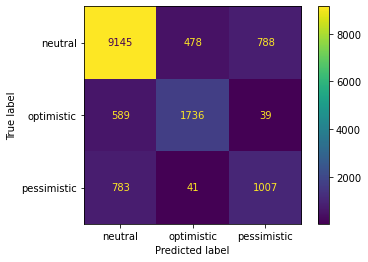

              precision    recall  f1-score   support

     neutral       0.87      0.88      0.87     10411
  optimistic       0.77      0.73      0.75      2364
 pessimistic       0.55      0.55      0.55      1831

    accuracy                           0.81     14606
   macro avg       0.73      0.72      0.73     14606
weighted avg       0.81      0.81      0.81     14606



In [63]:
asian_banks_dt = decision_tree_evaluation(bow_discrete_asian_banks)

* Asset Managers

Accuracy score of decision tree classifier is 0.8501015228426396


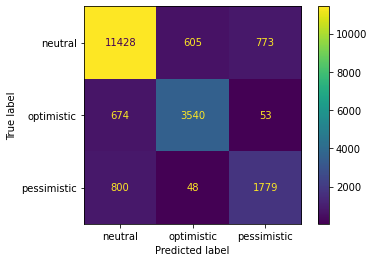

              precision    recall  f1-score   support

     neutral       0.89      0.89      0.89     12806
  optimistic       0.84      0.83      0.84      4267
 pessimistic       0.68      0.68      0.68      2627

    accuracy                           0.85     19700
   macro avg       0.80      0.80      0.80     19700
weighted avg       0.85      0.85      0.85     19700



In [64]:
asset_managers_dt = decision_tree_evaluation(bow_discrete_asset_managers)

* Insurance

Accuracy score of decision tree classifier is 0.8593817486271365


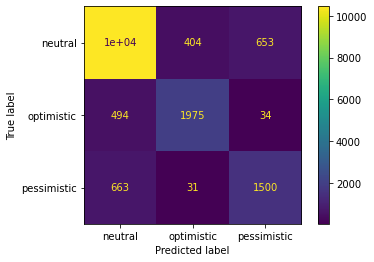

              precision    recall  f1-score   support

     neutral       0.90      0.91      0.90     11510
  optimistic       0.82      0.79      0.80      2503
 pessimistic       0.69      0.68      0.68      2194

    accuracy                           0.86     16207
   macro avg       0.80      0.79      0.80     16207
weighted avg       0.86      0.86      0.86     16207



In [65]:
insurance_dt = decision_tree_evaluation(bow_discrete_insurance)

* Pension Funds

Accuracy score of decision tree classifier is 0.8724578436382218


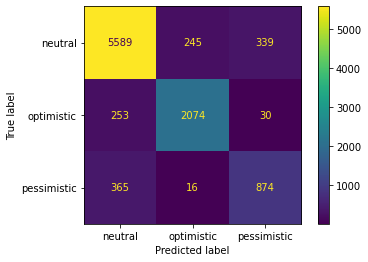

              precision    recall  f1-score   support

     neutral       0.90      0.91      0.90      6173
  optimistic       0.89      0.88      0.88      2357
 pessimistic       0.70      0.70      0.70      1255

    accuracy                           0.87      9785
   macro avg       0.83      0.83      0.83      9785
weighted avg       0.87      0.87      0.87      9785



In [66]:
pension_funds_dt = decision_tree_evaluation(bow_discrete_pension_funds)

#### (2) Logistic Regression

* Asian Banks

Accuracy score of logistic regression is 0.8538956593180884


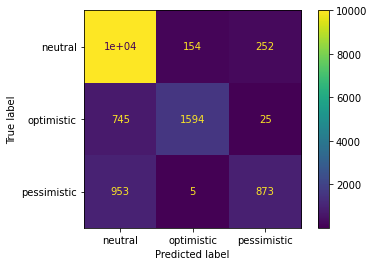

              precision    recall  f1-score   support

     neutral       0.85      0.96      0.90     10411
  optimistic       0.91      0.67      0.77      2364
 pessimistic       0.76      0.48      0.59      1831

    accuracy                           0.85     14606
   macro avg       0.84      0.70      0.75     14606
weighted avg       0.85      0.85      0.84     14606



In [67]:
asian_banks_lr = logistic_regression_evaluation(bow_discrete_asian_banks)

* Asset Managers

Accuracy score of logistic regression is 0.8651776649746193


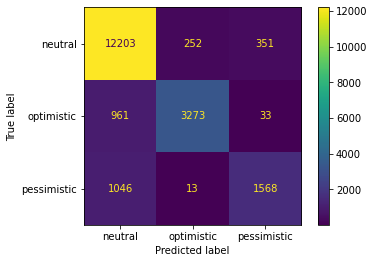

              precision    recall  f1-score   support

     neutral       0.86      0.95      0.90     12806
  optimistic       0.93      0.77      0.84      4267
 pessimistic       0.80      0.60      0.68      2627

    accuracy                           0.87     19700
   macro avg       0.86      0.77      0.81     19700
weighted avg       0.87      0.87      0.86     19700



In [68]:
asset_managers_lr = logistic_regression_evaluation(bow_discrete_asset_managers)

* Insurance

Accuracy score of logistic regression is 0.8643795890664527


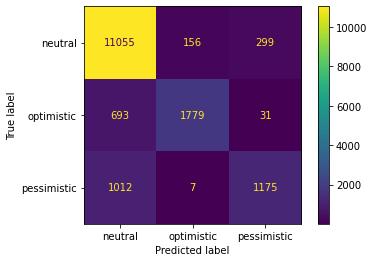

              precision    recall  f1-score   support

     neutral       0.87      0.96      0.91     11510
  optimistic       0.92      0.71      0.80      2503
 pessimistic       0.78      0.54      0.64      2194

    accuracy                           0.86     16207
   macro avg       0.85      0.74      0.78     16207
weighted avg       0.86      0.86      0.86     16207



In [69]:
insurance_lr = logistic_regression_evaluation(bow_discrete_insurance)

* Pension Funds

Accuracy score of logistic regression is 0.8711292795094533


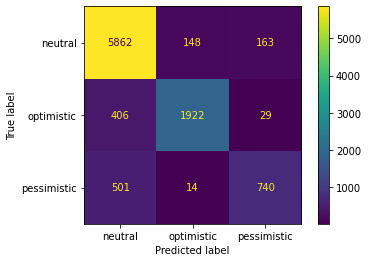

              precision    recall  f1-score   support

     neutral       0.87      0.95      0.91      6173
  optimistic       0.92      0.82      0.87      2357
 pessimistic       0.79      0.59      0.68      1255

    accuracy                           0.87      9785
   macro avg       0.86      0.78      0.82      9785
weighted avg       0.87      0.87      0.87      9785



In [70]:
pension_funds_lr = logistic_regression_evaluation(bow_discrete_pension_funds)

#### (3) Naive Bayes

* Asian Banks

Accuracy score of naive bayes is 0.7512666027659866


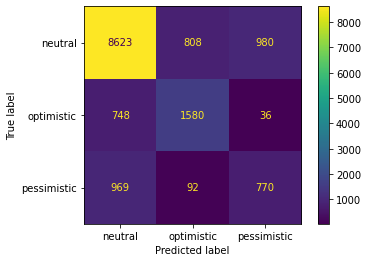

              precision    recall  f1-score   support

     neutral       0.83      0.83      0.83     10411
  optimistic       0.64      0.67      0.65      2364
 pessimistic       0.43      0.42      0.43      1831

    accuracy                           0.75     14606
   macro avg       0.63      0.64      0.64     14606
weighted avg       0.75      0.75      0.75     14606



In [71]:
asian_banks_nb = naive_bayes_evaluation(bow_discrete_asian_banks)

* Asset Managers

Accuracy score of naive bayes is 0.722994923857868


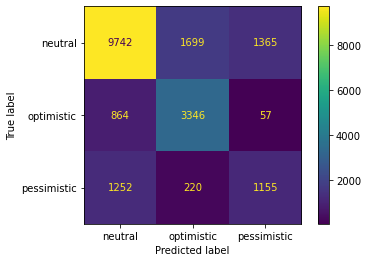

              precision    recall  f1-score   support

     neutral       0.82      0.76      0.79     12806
  optimistic       0.64      0.78      0.70      4267
 pessimistic       0.45      0.44      0.44      2627

    accuracy                           0.72     19700
   macro avg       0.64      0.66      0.65     19700
weighted avg       0.73      0.72      0.72     19700



In [72]:
asset_managers_nb = naive_bayes_evaluation(bow_discrete_asset_managers)

* Insurance

Accuracy score of naive bayes is 0.7000061701733818


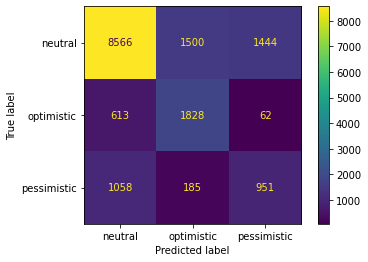

              precision    recall  f1-score   support

     neutral       0.84      0.74      0.79     11510
  optimistic       0.52      0.73      0.61      2503
 pessimistic       0.39      0.43      0.41      2194

    accuracy                           0.70     16207
   macro avg       0.58      0.64      0.60     16207
weighted avg       0.73      0.70      0.71     16207



In [73]:
insurance_nb = naive_bayes_evaluation(bow_discrete_insurance)

* Pension Funds

Accuracy score of naive bayes is 0.7257026060296372


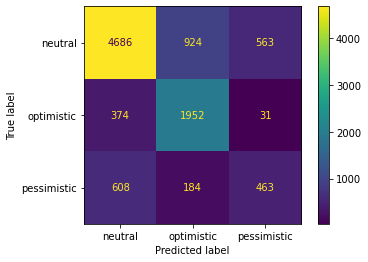

              precision    recall  f1-score   support

     neutral       0.83      0.76      0.79      6173
  optimistic       0.64      0.83      0.72      2357
 pessimistic       0.44      0.37      0.40      1255

    accuracy                           0.73      9785
   macro avg       0.63      0.65      0.64      9785
weighted avg       0.73      0.73      0.72      9785



In [74]:
pension_funds_nb = naive_bayes_evaluation(bow_discrete_pension_funds)

#### Overall Comparison of Accuracy

In [75]:
comparison_data = {'Decision Tree': [asian_banks_dt, asset_managers_dt, insurance_dt, pension_funds_dt],
                   'Logistic Regression': [asian_banks_lr, asset_managers_lr, insurance_lr, pension_funds_lr],
                   'Naive Bayes': [asian_banks_nb, asset_managers_nb, insurance_nb, pension_funds_nb]}
comparison = pd.DataFrame(comparison_data, index=['Asian Banks',
                                                 'Asset Managers',
                                                 'Insurance',
                                                 'Pension Funds'])
comparison

,Decision Tree,Logistic Regression,Naive Bayes
Asian Banks,0.813912,0.853896,0.751267
Asset Managers,0.850102,0.865178,0.722995
Insurance,0.859382,0.864380,0.700006
Pension Funds,0.872458,0.871129,0.725703
